In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

celeb_data = pd.read_csv('../list_attr_celeba.csv')

# clean the data
celeb_data.replace(1, 1.0, inplace=True)
celeb_data.replace(-1, 0.0, inplace=True)
celeb_data.drop(columns = ['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie'], inplace=True)

column_names = celeb_data.drop("Attractive", axis=1).columns
X = celeb_data.drop("Attractive", axis=1)
y = celeb_data["Attractive"]

In [20]:
# training and testing split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# training lasso (logistic regression with L1 regularization)
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=10.0)
lasso.fit(X_train_scaled, y_train)
coefficients = lasso.coef_[0]

selected_features = column_names[coefficients != 0]
print("Selected Features:")
for feature, coef in zip(selected_features, coefficients[coefficients != 0]):
    print(f"{feature}: {coef:.4f}")

# training KNN model
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)

Selected Features:
Bald: -0.1812
Big_Lips: -0.0051
Big_Nose: -0.1181
Black_Hair: 0.0504
Blond_Hair: 0.0741
Brown_Hair: 0.1317
Chubby: -0.4323
Double_Chin: -0.2020
Eyeglasses: -0.2884
Goatee: -0.0535
Gray_Hair: -0.2919
Heavy_Makeup: 0.6945
High_Cheekbones: 0.1662
Male: -0.0744
Mustache: -0.0425
Narrow_Eyes: -0.1317
No_Beard: -0.0715
Oval_Face: 0.2490
Pale_Skin: 0.1778
Pointy_Nose: 0.2642
Receding_Hairline: -0.2361
Rosy_Cheeks: 0.0640
Sideburns: 0.0850
Straight_Hair: 0.1739
Wavy_Hair: 0.1860
Young: 0.6541


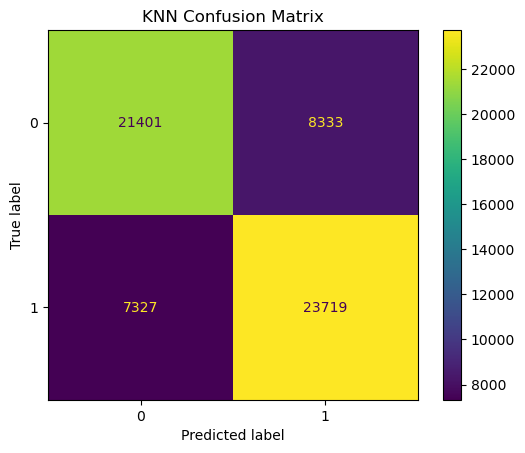

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("KNN Confusion Matrix")
plt.show()

In [22]:
# metrics
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")
# precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.6f}")
# recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.6f}")
# F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.6f}")

Accuracy: 0.742349
Precision: 0.740016
Recall: 0.763995
F1 Score: 0.751815
